<a href="https://colab.research.google.com/github/NikhithaSree24/ML-PROJECT/blob/main/SENTIMENT_ANALYSIS_FOR_MOVIE_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model Accuracy: 68.40%


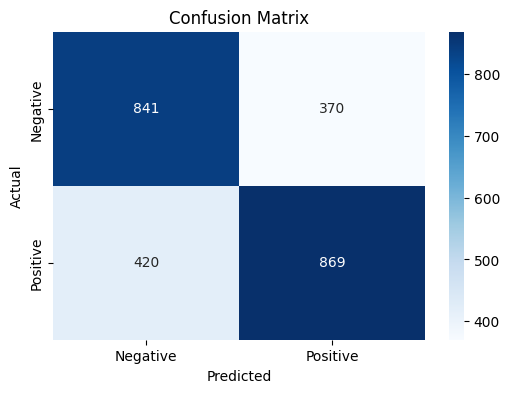

Classification Report:

              precision    recall  f1-score   support

    Negative       0.67      0.69      0.68      1211
    Positive       0.70      0.67      0.69      1289

    accuracy                           0.68      2500
   macro avg       0.68      0.68      0.68      2500
weighted avg       0.68      0.68      0.68      2500

Example Comment: The movie was great.
Predicted Sentiment: Positive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pickle
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\([DP)][\W])')

# Data loading
data = pd.read_csv("/content/Test.csv")

# Preprocessing function
def preprocessing(text):
    if not text:
        return []
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', ' ')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set and word.isalnum()]

    return " ".join(text)

# Apply preprocessing
data['text'] = data['text'].apply(lambda x: preprocessing(x) if pd.notnull(x) else x)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)
y = data.label.values
x = tfidf.fit_transform(data.text)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5, shuffle=False)

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n")
print(class_report)

# Save model and tfidf vectorizer
pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

# Prediction function using the Decision Tree model
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction

# Example prediction results for the input comment
example_comment = "The movie was great."
pred_result = prediction(example_comment)

# Displaying the prediction result
print(f"Example Comment: {example_comment}")
if pred_result == 1:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


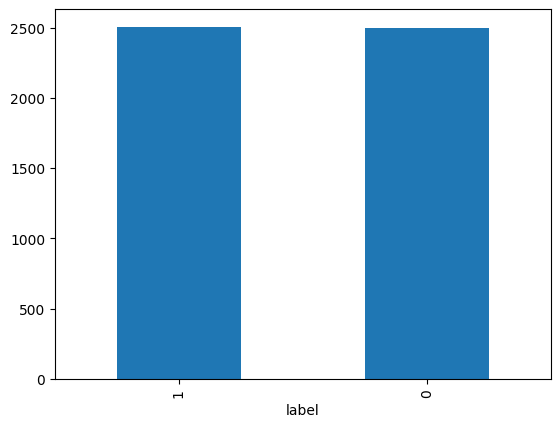

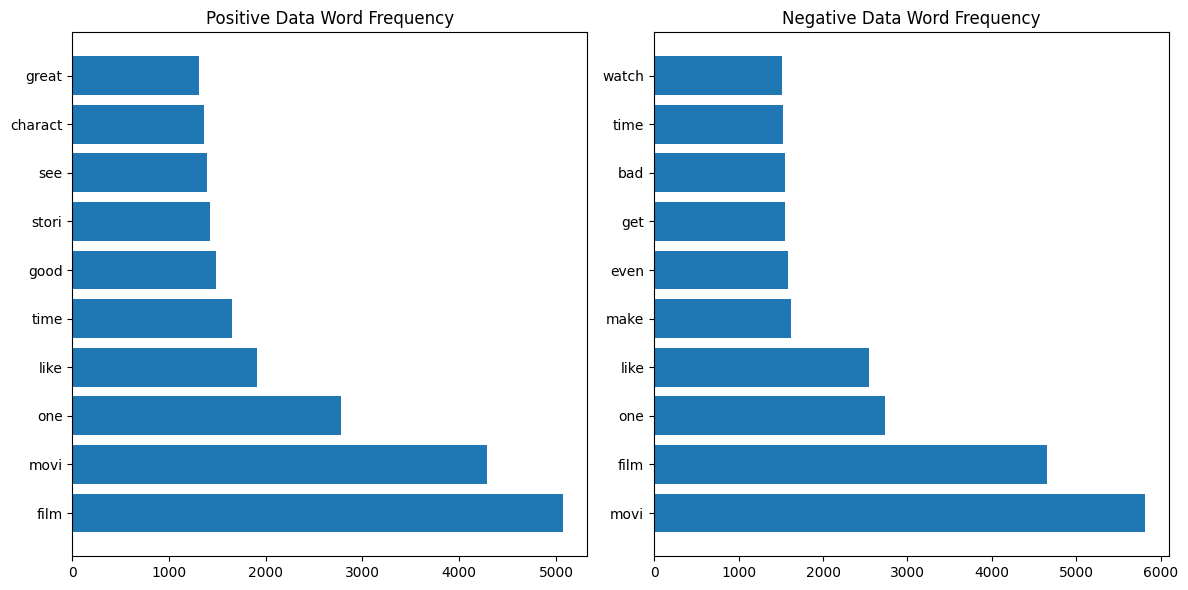

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   44.6s finished


Accuracy: 0.8604
negative comment


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/Test.csv")
data.head()
data['label'].value_counts()

data['label'].value_counts().plot(kind='bar')
data['text'][66]
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\([DP)][\W])')

def preprocessing(text):
    if not text:
        return []
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-',' ')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set and word.isalnum()]

    return " ".join(text)
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')
data['text'] = data['text'].apply(lambda x: preprocessing(x) if pd.notnull(x) else x)
data['text']
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']
import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')


plt.tight_layout()
plt.show()
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction


prediction=prediction("The movie was bad.")
if prediction == "positive":
    print("positive comment")
else:
    print("negative comment")

                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0
label
1    2505
0    2495
Name: count, dtype: int64


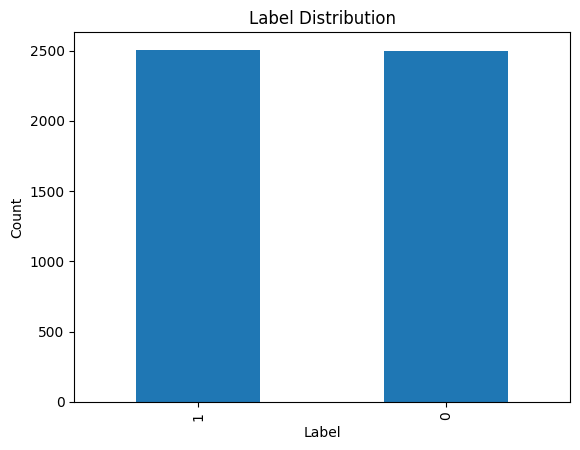

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   18.5s finished


Model Accuracy: 86.04%


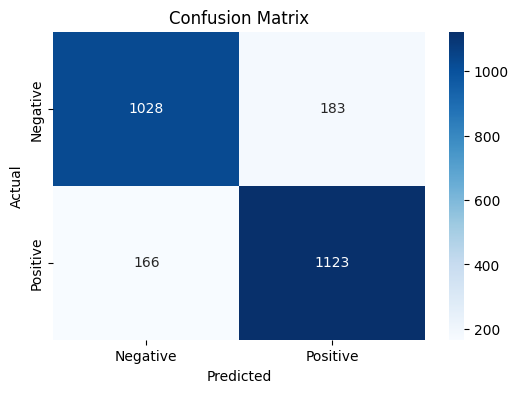

Classification Report:

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      1211
    Positive       0.86      0.87      0.87      1289

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500

Example Comment: The movie was great.
Predicted Sentiment: Positive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import pickle
from lime.lime_text import LimeTextExplainer  # Import LIME

# Load data
data = pd.read_csv("/content/Test.csv")

# Display the first few rows and label counts
print(data.head())
print(data['label'].value_counts())

# Plot label distribution
data['label'].value_counts().plot(kind='bar', title='Label Distribution', xlabel='Label', ylabel='Count')
plt.show()

# Download NLTK stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\([DP)][\W])')

# Preprocessing function
def preprocessing(text):
    if not text:
        return []
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', ' ')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set and word.isalnum()]

    return " ".join(text)

# Apply preprocessing
data['text'] = data['text'].apply(lambda x: preprocessing(x) if pd.notnull(x) else x)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)
y = data.label.values
x = tfidf.fit_transform(data.text)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5, shuffle=False)

# Train Logistic Regression model
clf = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=500).fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix Visualization
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n")
print(class_report)

# Save model and tfidf vectorizer
pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['Negative', 'Positive'])

# Prediction function using the Logistic Regression model
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction

# Example prediction
example_comment = "The movie was great."

# Display example prediction result
pred_result = prediction(example_comment)
print(f"Example Comment: {example_comment}")
if pred_result == 1:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")

# Function to explain the prediction using LIME
def explain_prediction(text):
    # Get the prediction probabilities
    preprocessed_text = preprocessing(text)
    comment_list = [preprocessed_text]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)  # Transform to a 2D sparse matrix
    pred_proba = clf.predict_proba(comment_vector)

    # Explain the prediction
    # Pass the preprocessed text to explain_instance
    exp = explainer.explain_instance(preprocessed_text,
                                     clf.predict_proba,
                                     num_features=10,
                                     labels=[0, 1]) # Specify labels for binary classification

    # Visualize the explanation
    exp.show_in_notebook()




In [9]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f5663cfb82dd85ec217f2eb2bdaf3e1fb8fa31d90a004a76e3fa2c4af9dd479a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
